In [1]:
import pandas as pd


In [2]:
train = pd.read_csv('train.csv')


In [3]:
train.head()


,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [4]:
## Import Essential Libraries 
!pip install geocoder

import os #for file part
from math import * # for mathmatically relations & computation  
from scipy.stats import * # Stat testing
import numpy as np # array operations 
import re # working on text data 
import pandas as pd # dataframe operations
import matplotlib.pyplot as plt # visualisations
import seaborn as sns # Viz
import geocoder # Geographical Data analysis
import geopy # Geographical data
from geopy.geocoders import Nominatim  # Geographical data

# All machine leanring libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import geopy # Geographical data
from geopy.geocoders import Nominatim  # Geographical data

In [7]:
## Getting to know the data

In [8]:
train.shape

(10884, 30)

In [9]:
train.info() # lookin for dtypes , null values inside data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            10884 non-null  int64  
 1   bathrooms          10884 non-null  int64  
 2   area               10884 non-null  float64
 3   furnishing         10884 non-null  object 
 4   avalable_for       10884 non-null  object 
 5   address            10884 non-null  object 
 6   floor_number       10884 non-null  int64  
 7   facing             10884 non-null  object 
 8   floor_type         10884 non-null  object 
 9   gate_community     10884 non-null  object 
 10  corner_pro         10884 non-null  object 
 11  parking            10884 non-null  int64  
 12  wheelchairadption  10884 non-null  object 
 13  petfacility        10884 non-null  object 
 14  aggDur             10884 non-null  int64  
 15  noticeDur          10884 non-null  int64  
 16  lightbill          108

In [10]:
train.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [11]:
train.describe() # A brief stat of data

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,0.884693,7.423649,0.722345,0.172639,0.712422,0.750276,0.062201,0.048144,0.124495,0.032157,0.045296,7075.270764,3.670939e+04,257.493025,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,0.559457,7.670543,0.698966,0.377952,0.842667,0.432873,0.241532,0.214080,0.330160,0.176426,0.207962,17269.507644,5.589578e+04,1247.938097,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,275000.000000,1.500000e+06,40000.000000,1.234568e+08


In [12]:
df = train.copy() # createing a copy of original data of actual cleaning & feature engineering puppose

In [13]:
df.head(3)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0


In [14]:
df.area.replace(0, np.nan, inplace =  True)
df.area.isnull().sum()

pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'mean').T
pd.pivot_table(df, values= 'area', columns='bedroom', aggfunc= 'median').T

m1 = df['bedroom']  == 1
m2 = df['bedroom']  == 2
m3 = df['bedroom']  == 3
m4 = df['bedroom']  == 4
m5 = df['bedroom']  == 5
m6 = df['bedroom']  == 6
df.loc[m1, 'area'] = df.loc[m1,'area'].fillna(df.loc[m1,'area'].median())
df.loc[m2, 'area'] = df.loc[m2,'area'].fillna(df.loc[m2,'area'].median())
df.loc[m3, 'area'] = df.loc[m3,'area'].fillna(df.loc[m3,'area'].median())
df.loc[m4, 'area'] = df.loc[m4,'area'].fillna(df.loc[m4,'area'].median())
df.loc[m5, 'area'] = df.loc[m5,'area'].fillna(df.loc[m5,'area'].median())
df.loc[m6, 'area'] = df.loc[m6,'area'].fillna(df.loc[m6,'area'].median())

In [15]:
## few working requied on rent here intial
print('shape before', df.shape)
df.drop(df[df['rent'] >= 123456789].index, axis = 0, inplace = True) # this values is added by purpose while doing data cleaning 
print('shape after', df.shape)

shape before (10884, 30)
shape after (10883, 30)


In [16]:
num_columns = df.describe().columns
categorical_cols = df.describe(include= 'object').columns

In [17]:
# checking for binary data & oridinal & continous_data 
for i in df.columns:
    print(len(df[i].unique()), end = '    ')
# range varies form 2 to  6387

10    9    932    4    8    6387    10    9    15    2    2    9    2    2    25    7    2    3    6    2    2    2    2    2    2    174    162    184    143    321    

In [18]:
binary_variables = [i  for i in df.columns  if (len(df[i].unique()) == 2)]

In [19]:
ordinal_variables= [i for i in df.columns if ((len(df[i].unique()) > 2 ) and (len(df[i].unique()) <= 25))]

In [20]:
continous_variable = [i for i in df.columns if ((len(df[i].unique()) > 25))]
## Remove rent from data
continous_variable = continous_variable[:-1]


In [21]:
ordinal_variables

['bedroom',
 'bathrooms',
 'furnishing',
 'avalable_for',
 'floor_number',
 'facing',
 'floor_type',
 'parking',
 'aggDur',
 'noticeDur',
 'powerbackup',
 'propertyage']

In [22]:
continous_variable

['area', 'address', 'maintenance_amt', 'brok_amt', 'deposit_amt', 'mnt_amt']

In [23]:
binary_variables

['gate_community',
 'corner_pro',
 'wheelchairadption',
 'petfacility',
 'lightbill',
 'no_room',
 'pooja_room',
 'study_room',
 'others',
 'servant_room',
 'store_room']

In [24]:
target_variable = 'rent'

In [25]:
print(binary_variables, end = ' ')

('element in binary category', len(binary_variables))

['gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'lightbill', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room'] 

('element in binary category', 11)

In [26]:
df.gate_community.value_counts().index

Index(['Yes', 'No'], dtype='object', name='gate_community')

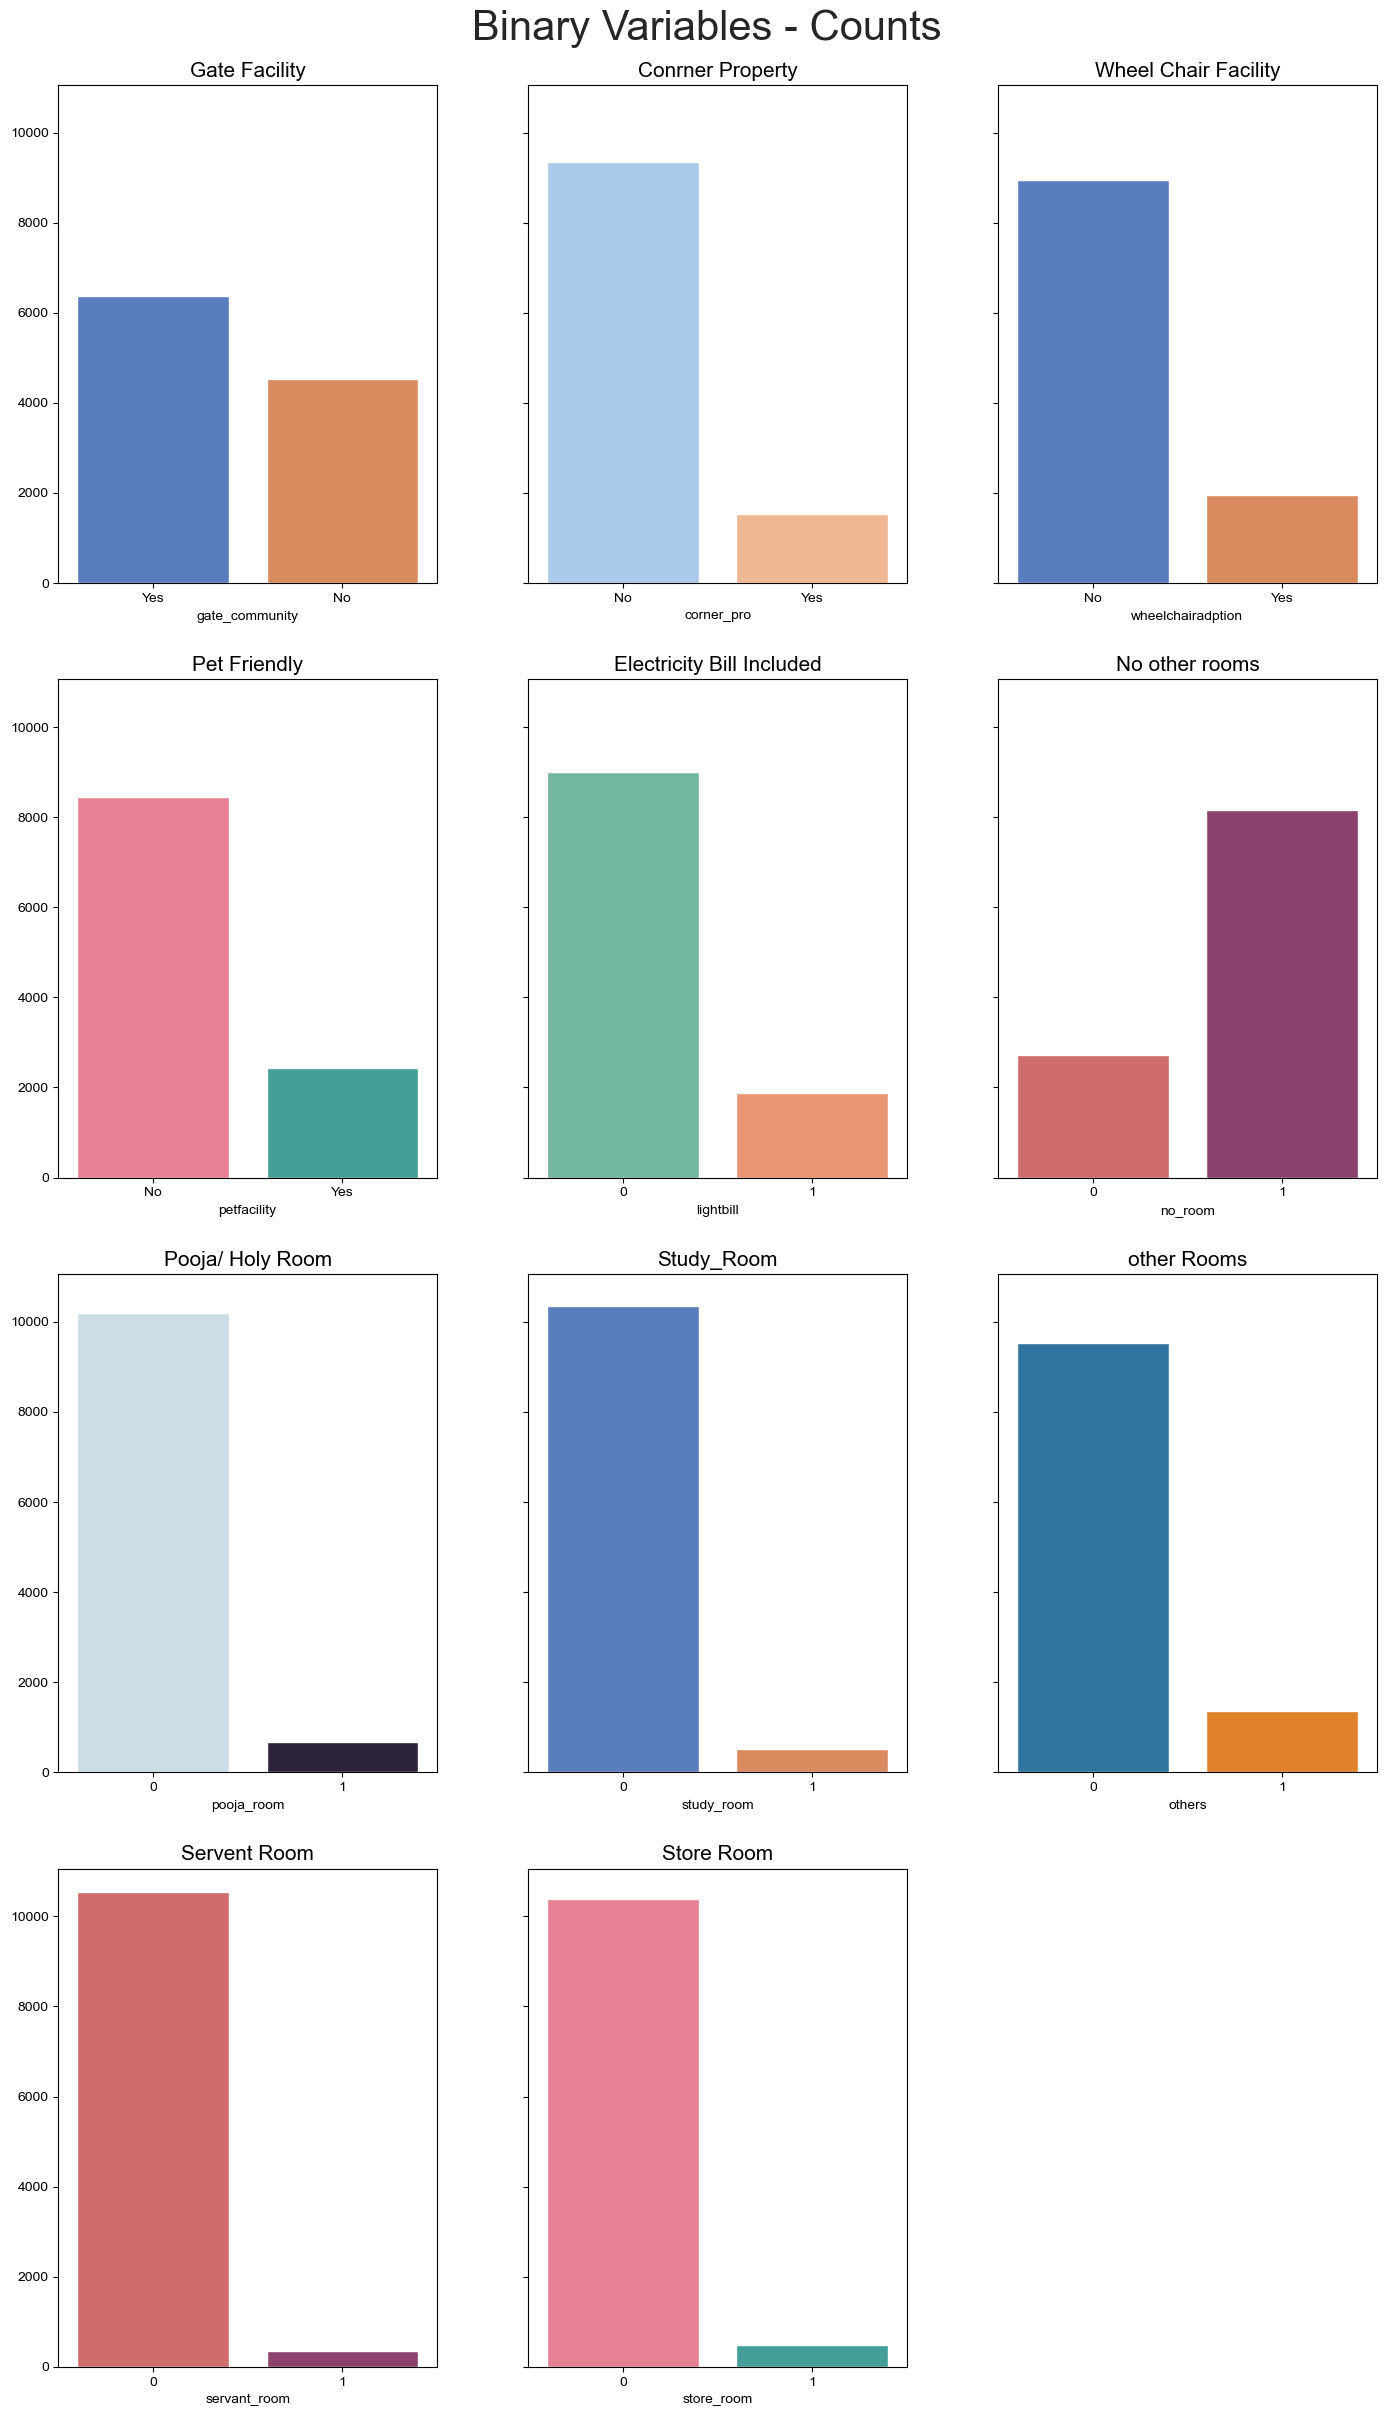

In [27]:
fig, ax = plt.subplots(4,3, figsize = (15,25), sharey = True)
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.95)

sns.set_style('whitegrid')

fig.suptitle('Binary Variables - Counts', size = 30)
sns.barplot(ax= ax[0,0], data =df , x = df.gate_community.value_counts().index, y = df.gate_community.value_counts().values,palette= 'muted' )

ax[0,0].set_title('Gate Facility', fontsize = 15)
sns.barplot(ax= ax[0,1], data =df , x = df.corner_pro.value_counts().index, y = df.corner_pro.value_counts().values,palette= 'pastel' )

ax[0,1].set_title('Conrner Property', fontsize = 15)
sns.barplot(ax= ax[0,2], data =df , x = df.wheelchairadption.value_counts().index, y = df.wheelchairadption.value_counts().values,palette= 'muted' )

ax[0,2].set_title('Wheel Chair Facility',   fontsize = 15)
sns.barplot(ax= ax[1,0], data =df , x = df.petfacility.value_counts().index, y = df.petfacility.value_counts().values,palette= 'husl' )

ax[1,0].set_title('Pet Friendly',  fontsize = 15)
sns.barplot(ax= ax[1,1], data =df , x = df.lightbill.value_counts().index, y = df.lightbill.value_counts().values,palette= 'Set2' )

ax[1,1].set_title('Electricity Bill Included',  fontsize = 15)
sns.barplot(ax= ax[1,2], data =df , x = df.no_room.value_counts().index, y = df.no_room.value_counts().values,palette= 'flare' )

ax[1,2].set_title('No other rooms',  fontsize = 15)
sns.barplot(ax= ax[2,0], data =df , x = df.pooja_room.value_counts().index, y = df.pooja_room.value_counts().values,palette= 'ch:s=.25,rot=-.25' )

ax[2,0].set_title('Pooja/ Holy Room',  fontsize = 15)
sns.barplot(ax= ax[2,1], data =df , x = df.study_room.value_counts().index, y = df.study_room.value_counts().values,palette= 'muted' )

ax[2,1].set_title('Study_Room',  fontsize = 15)
sns.barplot(ax= ax[2,2], data =df , x = df.others.value_counts().index, y = df.others.value_counts().values )

ax[2,2].set_title('other Rooms',  fontsize = 15)
sns.barplot(ax= ax[3,0], data =df , x = df.servant_room.value_counts().index, y = df.servant_room.value_counts().values,palette= 'flare' )

ax[3,0].set_title('Servent Room',  fontsize = 15)
sns.barplot(ax= ax[3,1], data =df , x = df.store_room.value_counts().index, y = df.store_room.value_counts().values,palette= 'husl' )

ax[3,1].set_title('Store Room',  fontsize = 15)
# sns.barplot(ax=ax[3,2], x = df.index, y = df.rent)
fig.delaxes(ax[3][2])
fig.savefig('my.jpg')

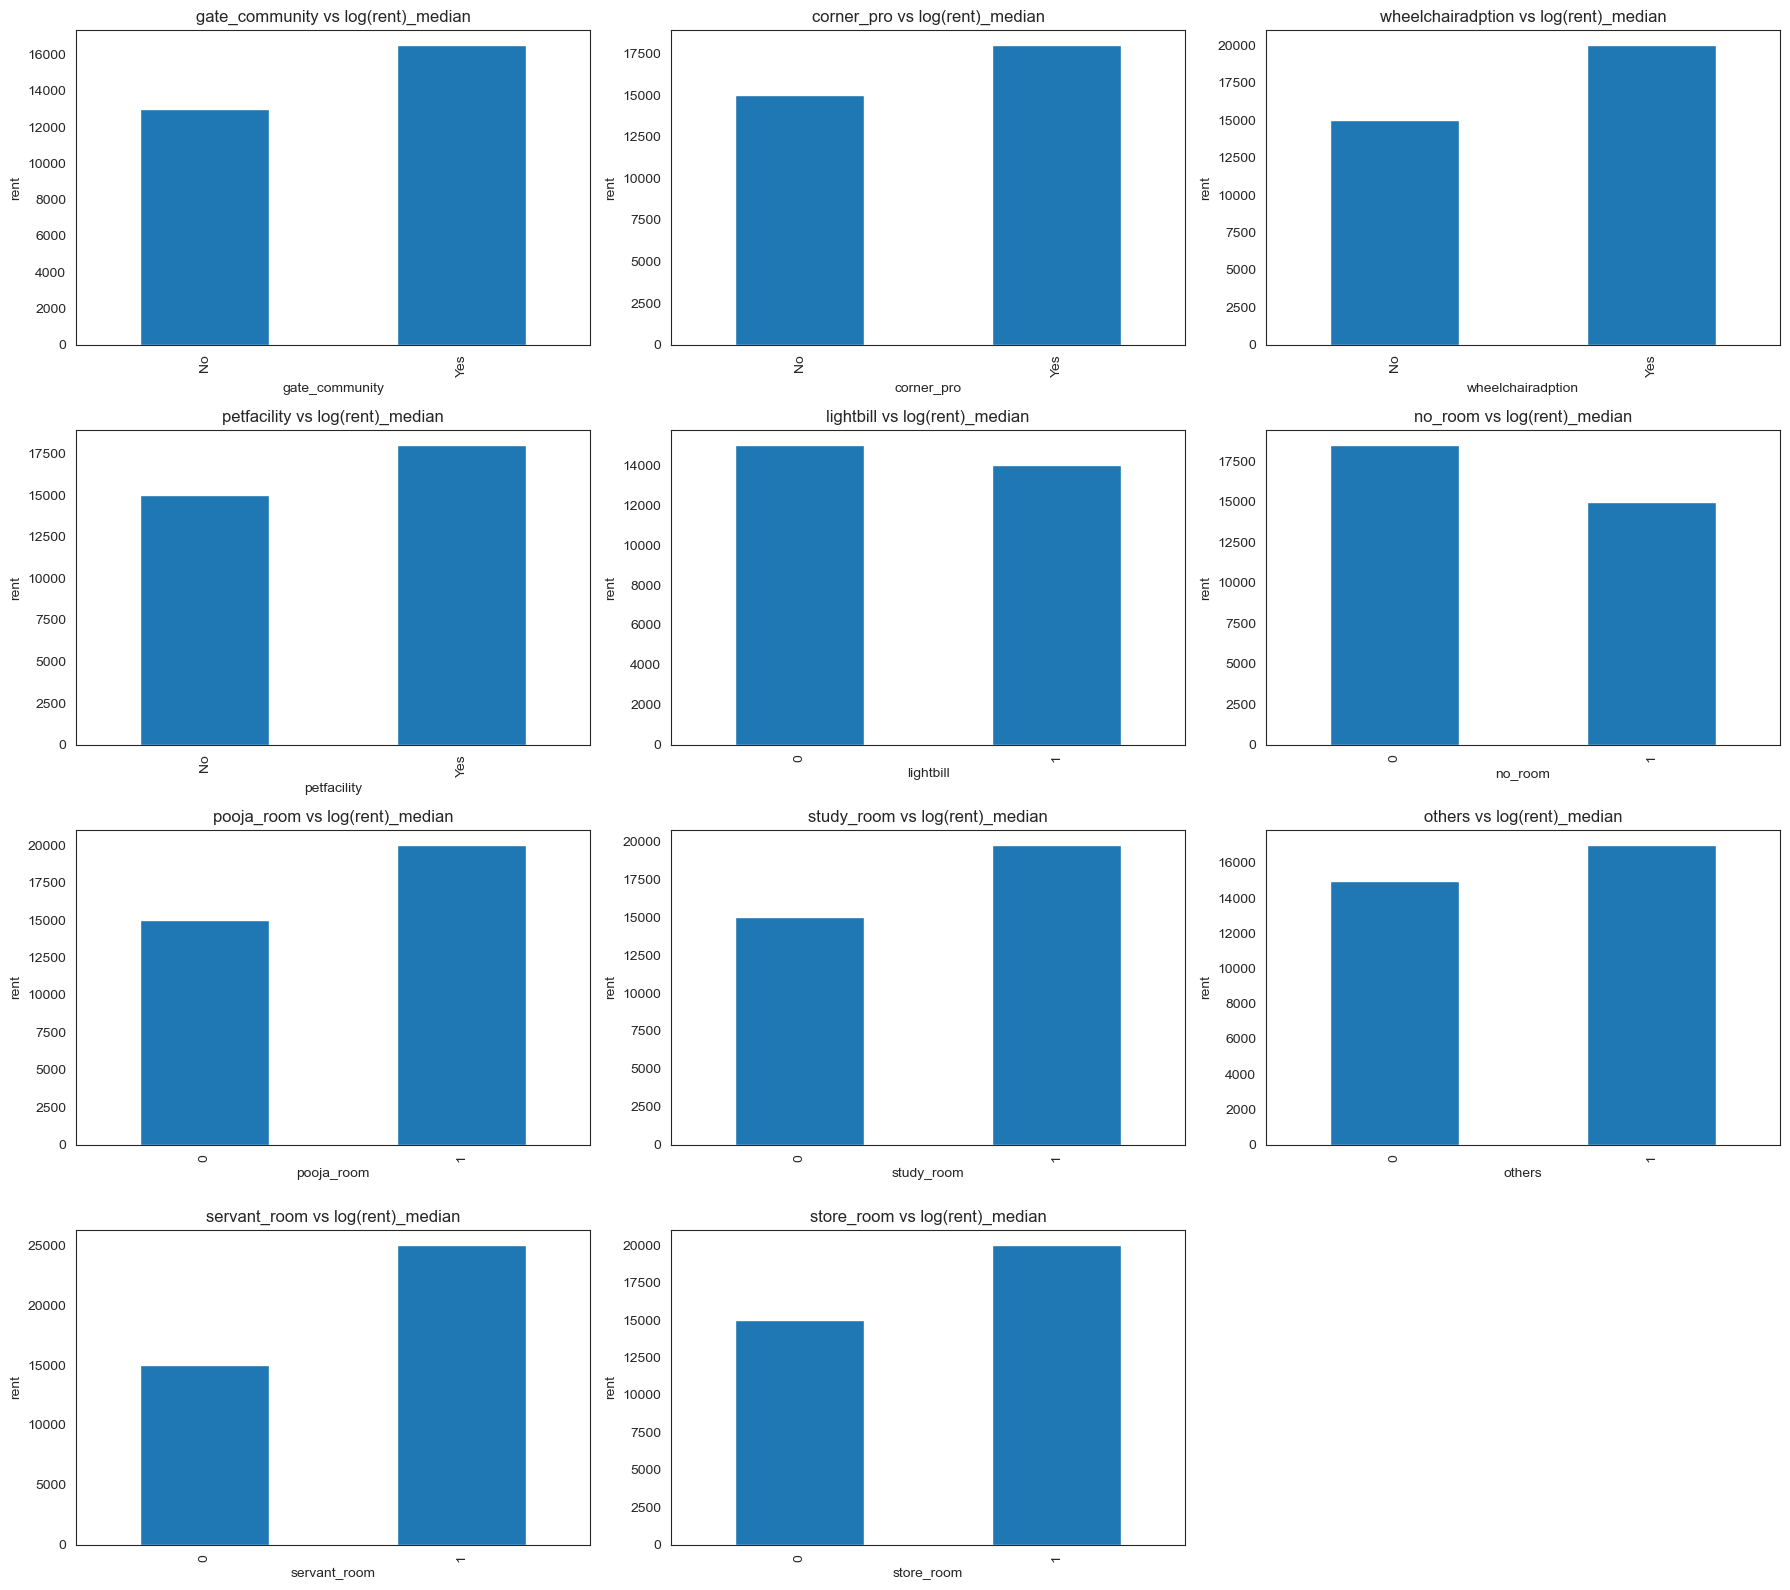

In [70]:
import matplotlib.pyplot as plt

# Set the number of plots per row and column
num_plots_per_row = 3
num_plots_per_column = (len(binary_variables) + num_plots_per_row - 1) // num_plots_per_row

# Calculate the total figure size based on the number of plots
fig_width = num_plots_per_row * 6  # 6 inches per plot
fig_height = num_plots_per_column * 4  # 4 inches per plot
plt.figure(figsize=(fig_width, fig_height))

target = 'rent'
for i, feature in enumerate(binary_variables, start=1):
    plt.subplot(num_plots_per_column, num_plots_per_row, i)
    df.groupby(feature)[target].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('{} vs log({})_median'.format(feature, target))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [29]:
### Based on above plots I found that if Facility is available then rent for home is always higher

In [30]:
print(ordinal_variables, end = ' ')
('Number of ordinal features is', len(ordinal_variables))

['bedroom', 'bathrooms', 'furnishing', 'avalable_for', 'floor_number', 'facing', 'floor_type', 'parking', 'aggDur', 'noticeDur', 'powerbackup', 'propertyage'] 

('Number of ordinal features is', 12)

In [31]:
### working on oultiers which I found while working on previously on project
df.groupby('bedroom').count()
# we have more than 6  bedrooms in single homes so we will drop to reduce outliers  totals around 20
print('before shape',df.shape)
df.drop(df[df['bedroom']>= 6].index, axis = 0, inplace = True)
print('after droping rows the shape is ', df.shape)

before shape (10883, 30)
after droping rows the shape is  (10877, 30)


In [32]:
print('before replacement', df.furnishing.unique())
df.furnishing.replace('Unfurnishe', 'Unfurnished', inplace = True)
print('after replacement', df.furnishing.unique())

before replacement ['Unfurnished' 'Semifurnished' 'Furnished' 'Unfurnishe']
after replacement ['Unfurnished' 'Semifurnished' 'Furnished']


In [33]:
print(ordinal_variables, end = ' ')
('Number of ordinal features is', len(ordinal_variables))

['bedroom', 'bathrooms', 'furnishing', 'avalable_for', 'floor_number', 'facing', 'floor_type', 'parking', 'aggDur', 'noticeDur', 'powerbackup', 'propertyage'] 

('Number of ordinal features is', 12)

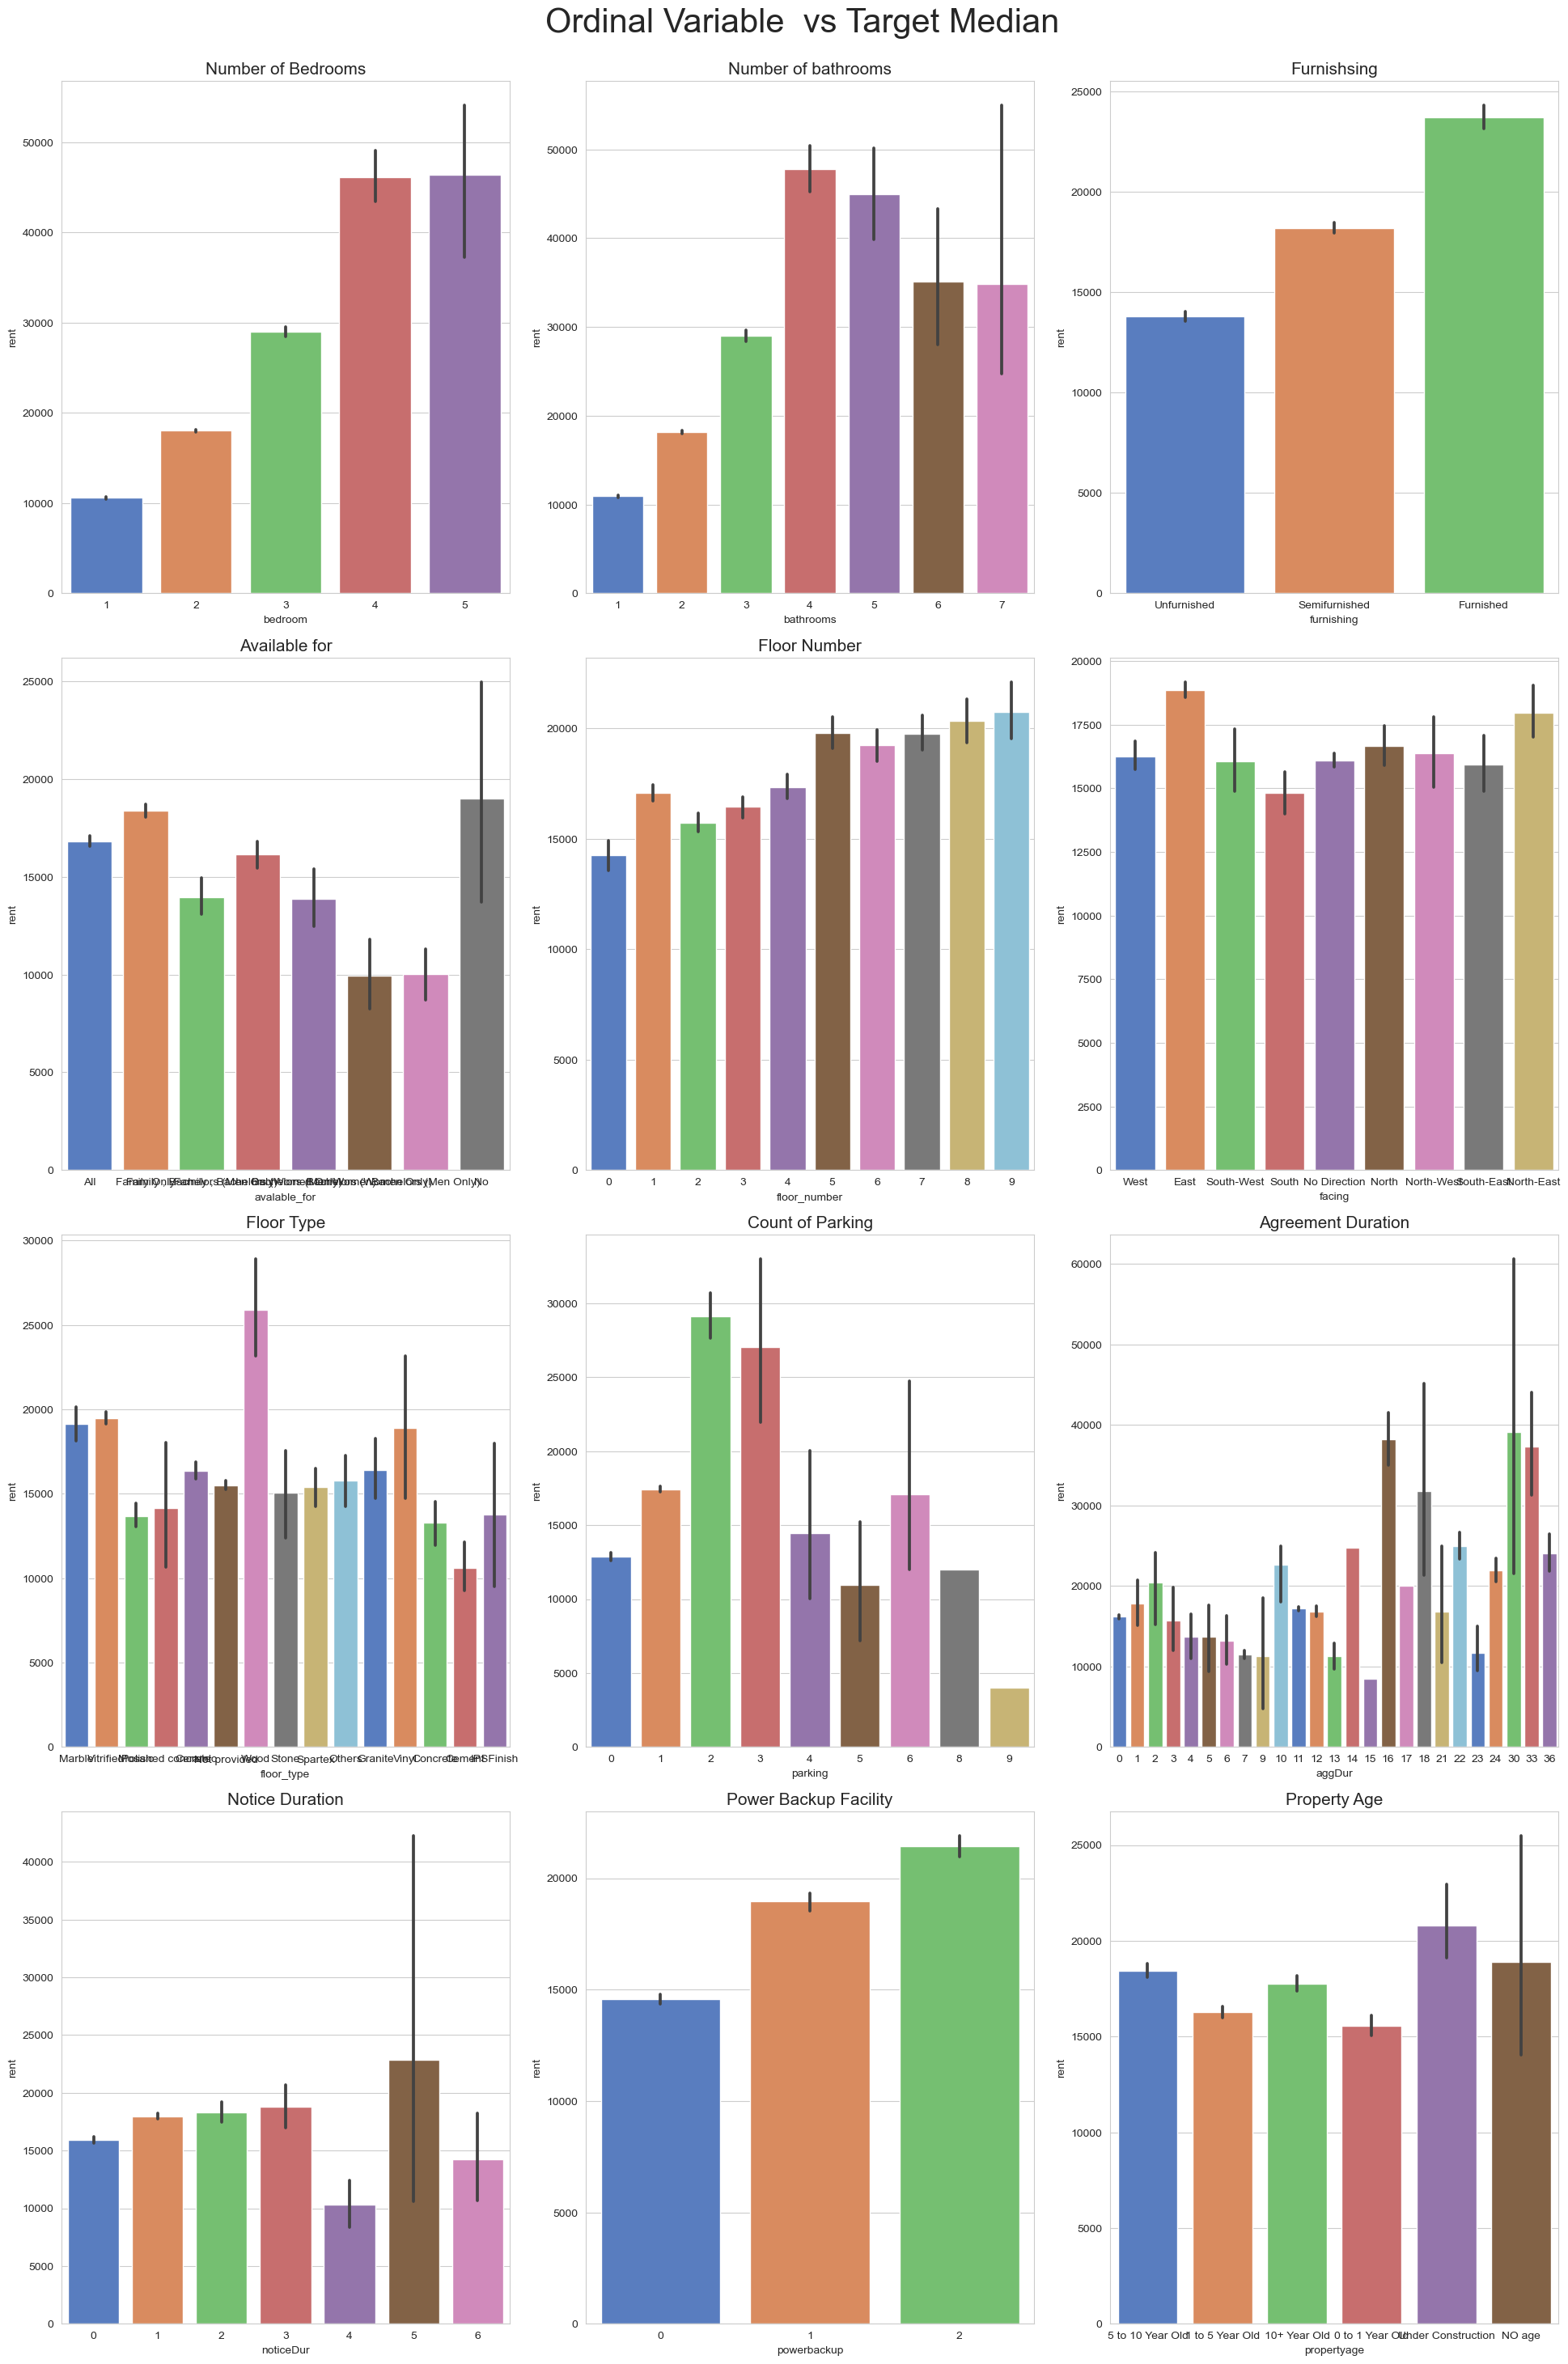

In [34]:
fig, ax = plt.subplots(4,3, figsize = (20,30), sharey = False)
fig.tight_layout(pad= 4.0)
fig.subplots_adjust(top=0.95)

sns.set_style('white')
fig.suptitle('Ordinal Variable  vs Target Median', size = 30)
sns.barplot(ax= ax[0,0], data =df , x ='bedroom', y ='rent',palette= 'muted' )
ax[0,0].set_title('Number of Bedrooms', fontsize = 15)

sns.barplot(ax= ax[0,1], data =df , x = 'bathrooms', y ='rent',palette= 'muted' )
ax[0,1].set_title('Number of bathrooms', fontsize = 15)

sns.barplot(ax= ax[0,2], data =df , x = 'furnishing', y ='rent',palette= 'muted' )
ax[0,2].set_title('Furnishsing', fontsize = 15)

sns.barplot(ax= ax[1,0], data =df , x = 'avalable_for', y ='rent',palette= 'muted' )
ax[1,0].set_title('Available for', fontsize = 15)

sns.barplot(ax= ax[1,1], data =df , x = 'floor_number', y ='rent',palette= 'muted' )
ax[1,1].set_title('Floor Number', fontsize = 15)

sns.barplot(ax= ax[1,2], data =df , x = 'facing', y ='rent',palette= 'muted' )
ax[1,2].set_title('', fontsize = 15)

sns.barplot(ax= ax[2,0], data =df , x = 'floor_type', y ='rent',palette= 'muted' )
ax[2,0].set_title('Floor Type', fontsize = 15)

sns.barplot(ax= ax[2,1], data =df , x = 'parking', y ='rent',palette= 'muted' )
ax[2,1].set_title('Count of Parking', fontsize = 15)

sns.barplot(ax= ax[2,2], data =df , x = 'aggDur', y ='rent',palette= 'muted' )
ax[2,2].set_title('Agreement Duration', fontsize = 15)

sns.barplot(ax= ax[3,0], data =df , x ='noticeDur', y ='rent',palette= 'muted' )
ax[3,0].set_title('Notice Duration', fontsize = 15)

sns.barplot(ax= ax[3,1], data =df , x ='powerbackup', y ='rent',palette= 'muted' )
ax[3,1].set_title('Power Backup Facility', fontsize = 15)

sns.barplot(ax= ax[3,2], data =df , x ='propertyage', y ='rent',palette= 'muted' )
ax[3,2].set_title('Property Age', fontsize = 15)

fig.savefig('ordinal_variable.jpg', dpi = 100)

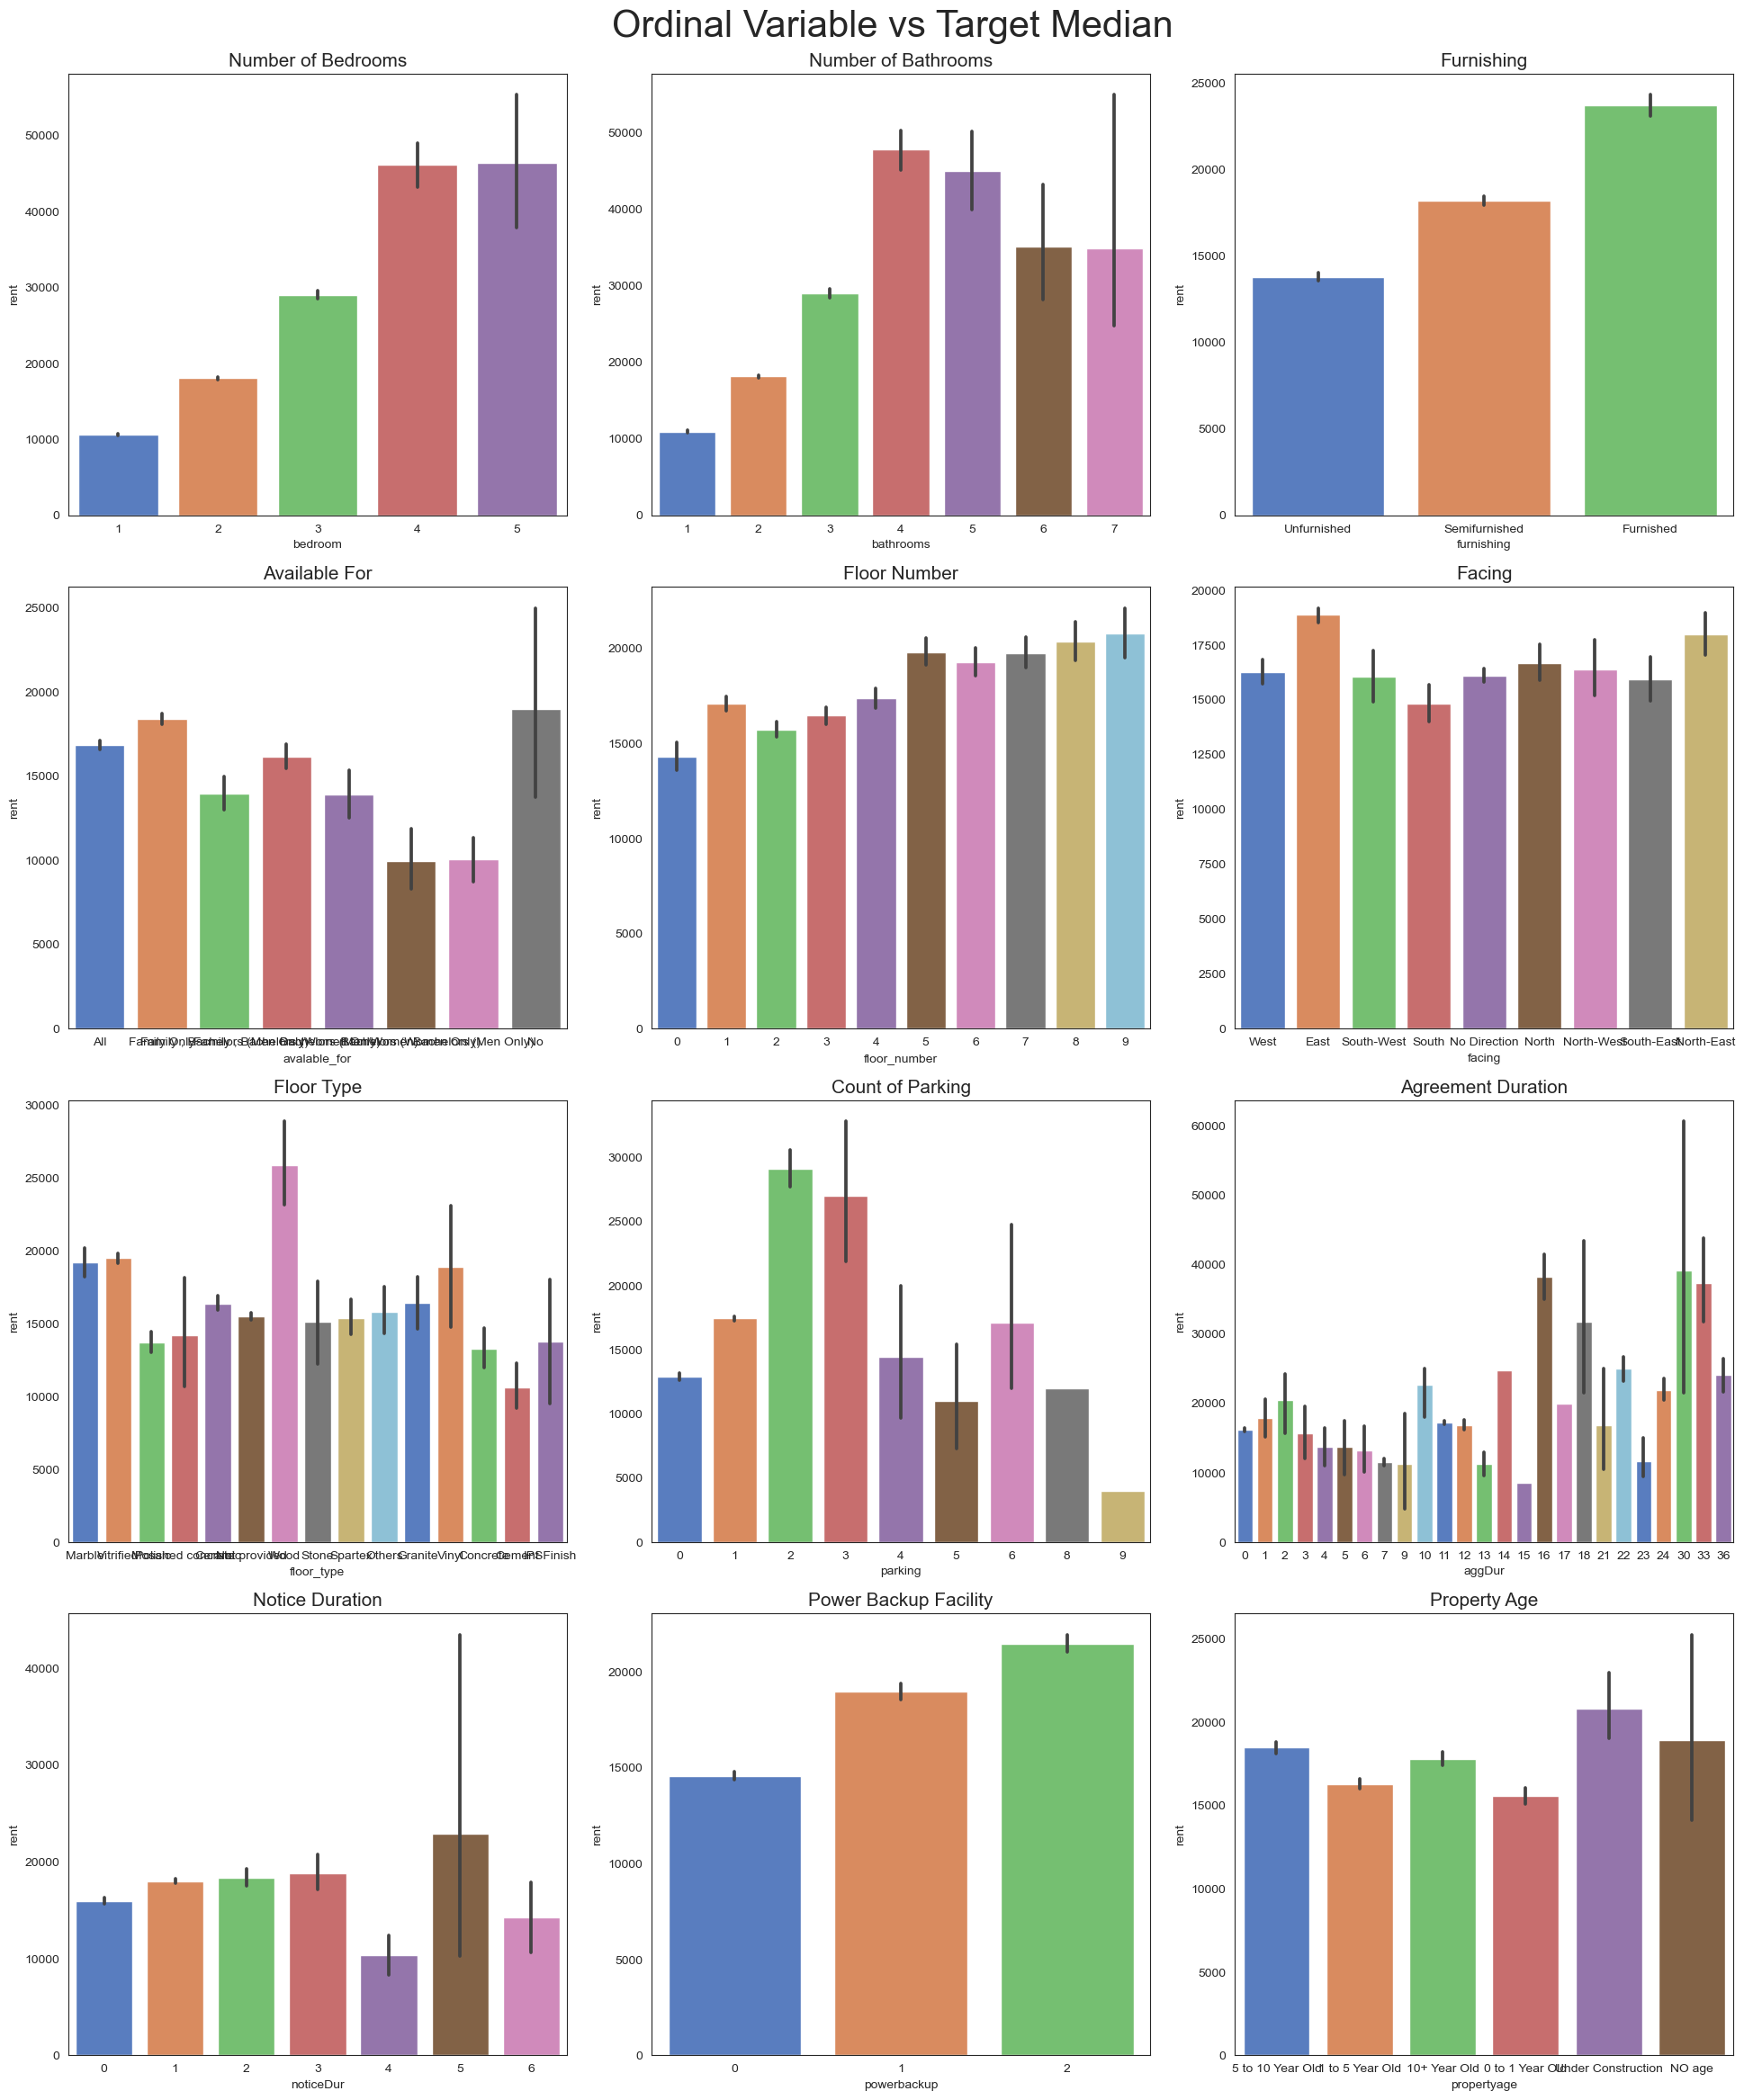

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of plots per row and column
num_rows = 4
num_cols = 3

# Set the figure size based on the number of subplots
fig_width = 20
fig_height = 6 * num_rows
fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the layout and top space for the title
plt.tight_layout(pad=4.0)
plt.subplots_adjust(top=0.95)

# Set the title and style
sns.set_style('white')
fig.suptitle('Ordinal Variable vs Target Median', size=30)

# Plot data in subplots
sns.barplot(ax=ax[0, 0], data=df, x='bedroom', y='rent', palette='muted')
ax[0, 0].set_title('Number of Bedrooms', fontsize=15)

sns.barplot(ax=ax[0, 1], data=df, x='bathrooms', y='rent', palette='muted')
ax[0, 1].set_title('Number of Bathrooms', fontsize=15)

sns.barplot(ax=ax[0, 2], data=df, x='furnishing', y='rent', palette='muted')
ax[0, 2].set_title('Furnishing', fontsize=15)

sns.barplot(ax=ax[1, 0], data=df, x='avalable_for', y='rent', palette='muted')
ax[1, 0].set_title('Available For', fontsize=15)

sns.barplot(ax=ax[1, 1], data=df, x='floor_number', y='rent', palette='muted')
ax[1, 1].set_title('Floor Number', fontsize=15)

sns.barplot(ax=ax[1, 2], data=df, x='facing', y='rent', palette='muted')
ax[1, 2].set_title('Facing', fontsize=15)

sns.barplot(ax=ax[2, 0], data=df, x='floor_type', y='rent', palette='muted')
ax[2, 0].set_title('Floor Type', fontsize=15)

sns.barplot(ax=ax[2, 1], data=df, x='parking', y='rent', palette='muted')
ax[2, 1].set_title('Count of Parking', fontsize=15)

sns.barplot(ax=ax[2, 2], data=df, x='aggDur', y='rent', palette='muted')
ax[2, 2].set_title('Agreement Duration', fontsize=15)

sns.barplot(ax=ax[3, 0], data=df, x='noticeDur', y='rent', palette='muted')
ax[3, 0].set_title('Notice Duration', fontsize=15)

sns.barplot(ax=ax[3, 1], data=df, x='powerbackup', y='rent', palette='muted')
ax[3, 1].set_title('Power Backup Facility', fontsize=15)

sns.barplot(ax=ax[3, 2], data=df, x='propertyage', y='rent', palette='muted')
ax[3, 2].set_title('Property Age', fontsize=15)

plt.savefig('ordinal_variable.jpg', dpi=100)
plt.show()


In [63]:
#Continuous Variables

# maintenace amt is similar to the mnt_amt & address has more unique values but it comes under categorical columnswe removed
#  both features & now we have area, brok_amt, deposit_amt & mnt_amount. 

continous_variable = continous_variable[0:1] +continous_variable[3:]

In [64]:
for i in continous_variable:
    print(i, len(df[i].unique()))

area 930
brok_amt 162
deposit_amt 184
mnt_amt 143


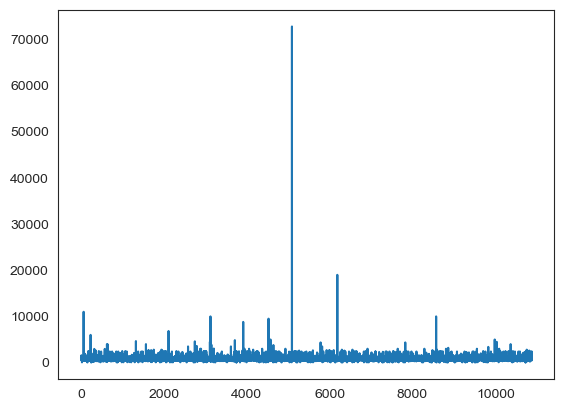

In [65]:
 plt.plot(df.area) # looking for abnormality 

In [66]:
print('shape before', df.shape)
df.drop(df[df['area'] > 15000].index, axis = 0, inplace = True)
print('shape after', df.shape)

shape before (10877, 30)
shape after (10875, 30)


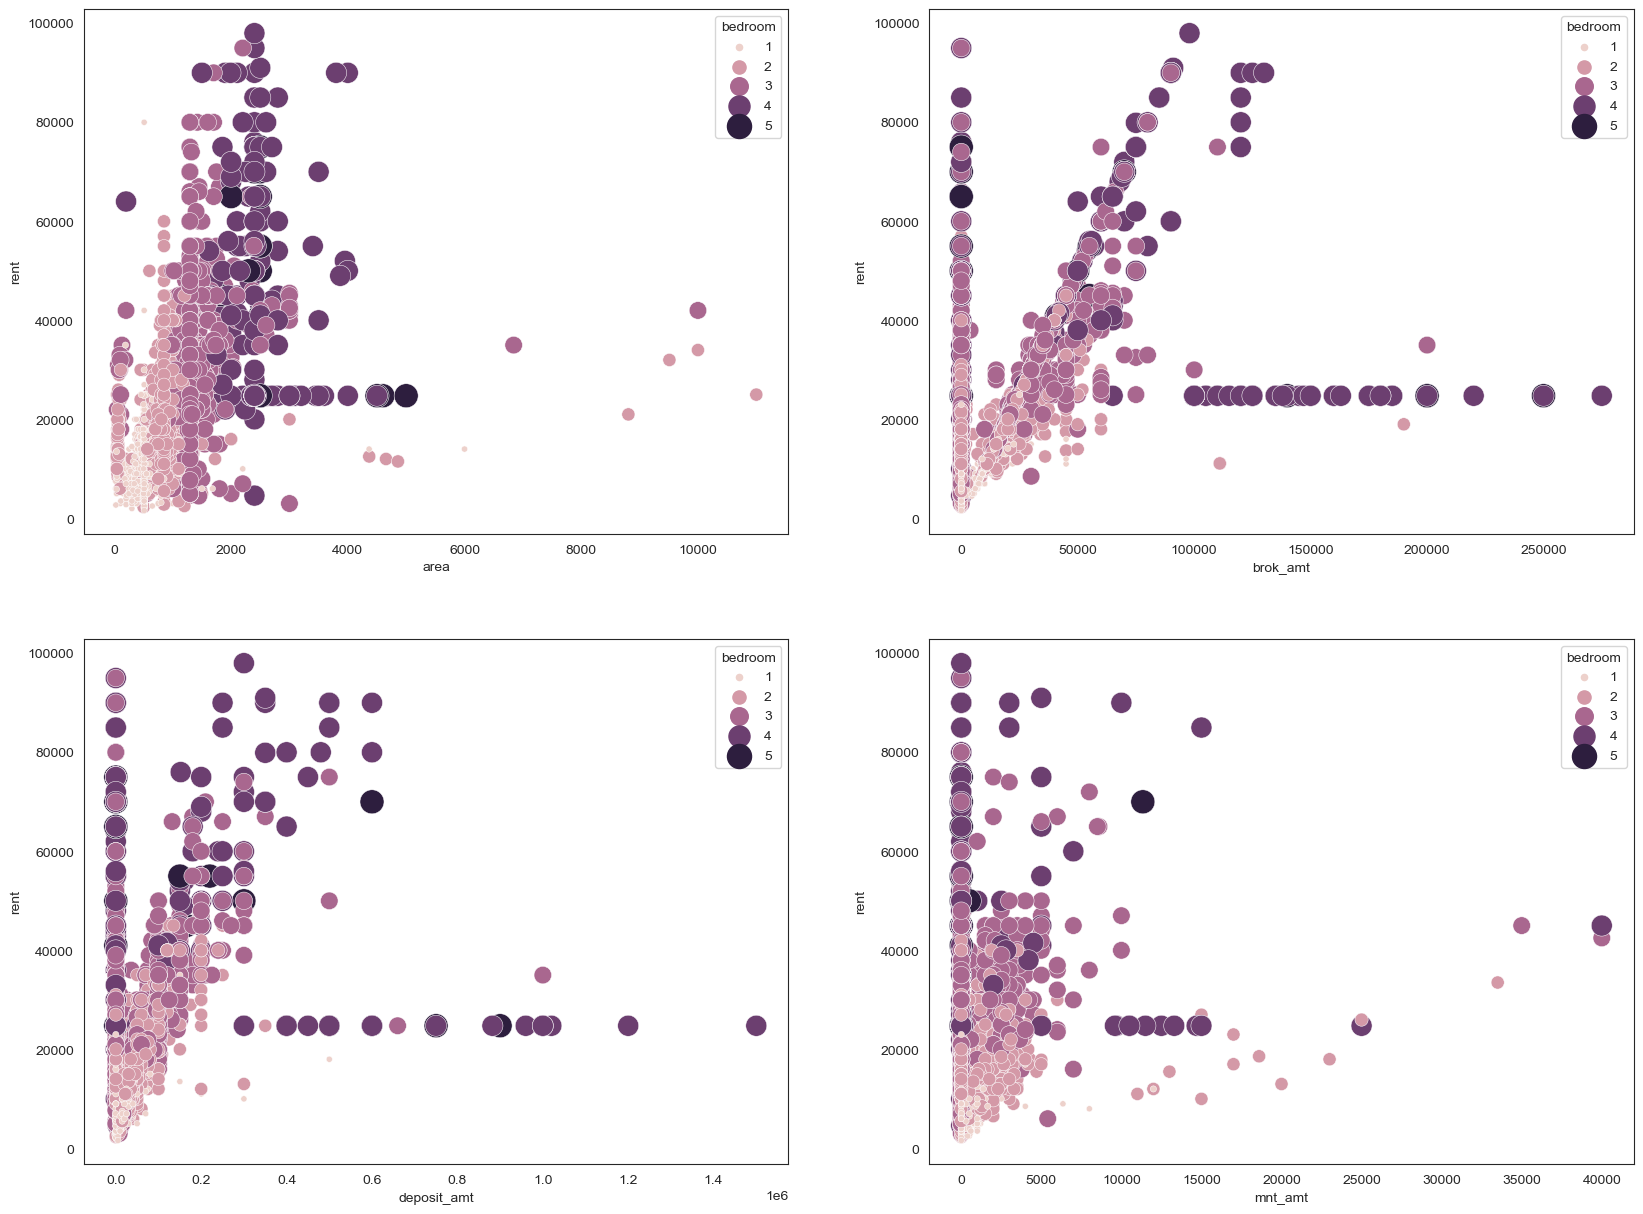

In [67]:
fig, ax =  plt.subplots(2,2, figsize=(20,15) )
sub = [(i,j)  for i in range(0,2) for j in range(0,2)]
for i, j in enumerate(continous_variable):
    sns.scatterplot(ax = ax[ sub[i][0],  sub[i][1]],  data = df, x = j, y = 'rent', hue= 'bedroom', size = 'bedroom', sizes = (20,300))

In [35]:
df2 = df.copy()

In [36]:
rows, columns = df2.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 10877
Number of columns: 30


In [51]:
df2a = df2.iloc[:500, :]

# Check the shape of the new dataframe
print("Shape of df2a:", df2a.shape)


Shape of df2a: (500, 30)


In [52]:
##NEW
import pandas as pd
import requests

# Define the function for geocoding
def geocode(address):
    api_key = 'ge-5a6f63328a6bb56d'  # Replace 'YOUR_API_KEY' with your actual API key from Geocode Earth
    base_url = f"https://api.geocode.earth/v1/search?text={address}&api_key={api_key}"
    try:
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()
        if data["features"]:
            # Extract the latitude and longitude from the first result
            latitude = data["features"][0]["geometry"]["coordinates"][1]
            longitude = data["features"][0]["geometry"]["coordinates"][0]
            return {"latitude": latitude, "longitude": longitude}
        else:
            return {"latitude": None, "longitude": None}
    except requests.exceptions.RequestException as e:
        print("Error:", e)
        return {"latitude": None, "longitude": None}

# Apply the geocoding function to each address in the DataFrame
coordinates = df2a["address"].apply(geocode)

# Add the latitude and longitude information to the DataFrame
df2a["latitude"] = [coord["latitude"] for coord in coordinates]
df2a["longitude"] = [coord["longitude"] for coord in coordinates]

# Display the updated DataFrame
print(df2a)


     bedroom  bathrooms    area     furnishing                   avalable_for  \
0          2          2  1050.0    Unfurnished                            All   
1          2          2   760.0    Unfurnished                            All   
2          3          3  1294.0  Semifurnished                            All   
3          1          1   628.0      Furnished                    Family Only   
4          2          2   668.0  Semifurnished  Family , Bachelors (Men Only)   
..       ...        ...     ...            ...                            ...   
495        2          2   750.0    Unfurnished                            All   
496        3          3  1294.0      Furnished                            All   
497        1          1   370.0    Unfurnished                            All   
498        2          2  1000.0  Semifurnished           Bachelors (Men Only)   
499        1          2   400.0  Semifurnished  Family , Bachelors (Men Only)   

                           

C:\Users\LENEVO\AppData\Local\Temp\ipykernel_9720\1485453091.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2a["latitude"] = [coord["latitude"] for coord in coordinates]
C:\Users\LENEVO\AppData\Local\Temp\ipykernel_9720\1485453091.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2a["longitude"] = [coord["longitude"] for coord in coordinates]


In [54]:
df2a = df2a.dropna()

In [68]:
print("New Shape of df2a:", df2a.shape)


New Shape of df2a: (375, 33)


In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium


# Select relevant features for clustering (latitude and longitude)
X = df2a[['latitude', 'longitude']]

# Scale the features (optional, but often recommended for clustering algorithms)
# You can skip scaling if your latitudes and longitudes are already in a comparable range
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters here
kmeans.fit(X)
df2a['cluster'] = kmeans.labels_

# Visualize clusters on map
map_clusters = folium.Map(location=[df2a['latitude'].mean(), df2a['longitude'].mean()], zoom_start=10)

# Define colors for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

# Add markers to the map for each data point
for lat, lon, cluster in zip(df2a['latitude'], df2a['longitude'], df2a['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)

# Save the map to an HTML file or display it in Jupyter Notebook
map_clusters.save("cluster_map2.html")  # Save map to an HTML file
map_clusters  # Display map in Jupyter Notebook


C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [59]:


# Assuming df is your DataFrame with 'latitudes' and 'longitudes' columns

# Define the boundaries of Maharashtra
maharashtra_bounds = {
    "min_lat": 15.6022,
    "max_lat": 22.7233,
    "min_lon": 72.6597,
    "max_lon": 80.8814
}

# Filter rows within Maharashtra boundaries
df2b = df2a[(df2a['latitude'] >= maharashtra_bounds['min_lat']) & 
                    (df2a['latitude'] <= maharashtra_bounds['max_lat']) & 
                    (df2a['longitude'] >= maharashtra_bounds['min_lon']) & 
                    (df2a['longitude'] <= maharashtra_bounds['max_lon'])]

# Display the filtered DataFrame
print(df2b)


     bedroom  bathrooms    area     furnishing                   avalable_for  \
7          2          2   900.0    Unfurnished                            All   
8          3          3  1294.0  Semifurnished                    Family Only   
9          3          3  1400.0    Unfurnished                            All   
10         2          2   850.0  Semifurnished                    Family Only   
11         2          2  1000.0    Unfurnished                            All   
..       ...        ...     ...            ...                            ...   
490        3          3  1294.0  Semifurnished                            All   
491        3          2  1294.0  Semifurnished                    Family Only   
496        3          3  1294.0      Furnished                            All   
498        2          2  1000.0  Semifurnished           Bachelors (Men Only)   
499        1          2   400.0  Semifurnished  Family , Bachelors (Men Only)   

                           

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium


# Select relevant features for clustering (latitude and longitude)
X = df2b[['latitude', 'longitude']]

# Scale the features (optional, but often recommended for clustering algorithms)
# You can skip scaling if your latitudes and longitudes are already in a comparable range
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters here
kmeans.fit(X)
df2b['cluster'] = kmeans.labels_

# Visualize clusters on map
map_clusters = folium.Map(location=[df2b['latitude'].mean(), df2b['longitude'].mean()], zoom_start=10)

# Define colors for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

# Add markers to the map for each data point
for lat, lon, cluster in zip(df2b['latitude'], df2b['longitude'], df2b['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)

# Save the map to an HTML file or display it in Jupyter Notebook
map_clusters.save("cluster_map2.html")  # Save map to an HTML file
map_clusters  # Display map in Jupyter Notebook


C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\LENEVO\AppData\Local\Temp\ipykernel_9720\3974443766.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2b['cluster'] = kmeans.labels_


In [61]:
import pandas as pd

# Assuming df2a is your DataFrame with 'latitude' and 'longitude' columns

# Define the boundaries of Pune, Maharashtra
pune_bounds = {
    "min_lat": 18.4452,
    "max_lat": 18.6298,
    "min_lon": 73.7174,
    "max_lon": 73.9390
}

# Filter rows within Pune boundaries
df2a_near_pune = df2a[(df2a['latitude'] >= pune_bounds['min_lat']) & 
                  (df2a['latitude'] <= pune_bounds['max_lat']) & 
                  (df2a['longitude'] >= pune_bounds['min_lon']) & 
                  (df2a['longitude'] <= pune_bounds['max_lon'])]

# Display the filtered DataFrame
print(df2a_near_pune)


     bedroom  bathrooms    area     furnishing                   avalable_for  \
7          2          2   900.0    Unfurnished                            All   
8          3          3  1294.0  Semifurnished                    Family Only   
9          3          3  1400.0    Unfurnished                            All   
10         2          2   850.0  Semifurnished                    Family Only   
11         2          2  1000.0    Unfurnished                            All   
..       ...        ...     ...            ...                            ...   
487        2          2  1600.0      Furnished                            All   
488        1          1   510.0  Semifurnished                    Family Only   
490        3          3  1294.0  Semifurnished                            All   
496        3          3  1294.0      Furnished                            All   
499        1          2   400.0  Semifurnished  Family , Bachelors (Men Only)   

                           

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium


# Select relevant features for clustering (latitude and longitude)
X = df2a_near_pune[['latitude', 'longitude']]

# Scale the features (optional, but often recommended for clustering algorithms)
# You can skip scaling if your latitudes and longitudes are already in a comparable range
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters here
kmeans.fit(X)
df2a_near_pune['cluster'] = kmeans.labels_

# Visualize clusters on map
map_clusters = folium.Map(location=[df2a_near_pune['latitude'].mean(), df2a_near_pune['longitude'].mean()], zoom_start=10)

# Define colors for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

# Add markers to the map for each data point
for lat, lon, cluster in zip(df2a_near_pune['latitude'], df2a_near_pune['longitude'], df2a_near_pune['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)

# Save the map to an HTML file or display it in Jupyter Notebook
map_clusters.save("cluster_map2.html")  # Save map to an HTML file
map_clusters  # Display map in Jupyter Notebook


C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENEVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENEVO\AppData\Local\Temp\ipykernel_9720\3079869521.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2a_near_pune['cluster'] = kmeans.labels_
